<a href="https://colab.research.google.com/github/CorporateStereotype/ffz/blob/main/FFZ_20250208ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Author: Flint Adkins
Date: 20241221

1. Attribution (Credit Must Be Given)
You are free to view, read, and cite this work, but you must **attribute credit** to the original creator, Flint Adkins in any use of the ideas, frameworks, concepts, or mathematical models presented in this work. Proper attribution must include:
- The author's name (**Flint Adkins**).
- The title of the work (**Formula For Zero: Unified Theoretical Framework**).
- A citation link to the https://doi.org/10.17605/OSF.IO/3TN7F  or the source where the work is hosted.

2. Non-Commercial Use Only
You **may not use this work for commercial purposes**. This includes selling, licensing, or using the concepts, mathematical models, designs, or frameworks for any commercial, for-profit, or monetary gain. To seek **commercial use rights**, you must obtain prior written permission from the author, **Flint Adkins**.

3. No Derivatives
You **may not modify, remix, adapt, or create derivative works** from this content without explicit permission from the author, **Flint Adkins**.
- You can read, share, and cite the work as it is, but you cannot modify, change, or create new works that are "based on" this framework without permission.
- To obtain permission to create derivatives, you must contact the author directly.

4. Right to Request Removal
The author, **Flint Adkins**, reserves the right to request the removal of unauthorized copies, commercial use, or derivative works that violate the terms of this license.

5. Legal Enforcement
Any use of this work that violates the terms of this license is subject to copyright enforcement under **international copyright law**. If you wish to negotiate rights for commercial use, derivatives, or modifications, please contact the author at **flintadkins@gmail.com**.

6. Limitations and Disclaimers
This work is provided "as-is," without warranty of any kind, either expressed or implied. The author disclaims all liability for potential misuse or misinterpretation of the contents.

7. Applicable Jurisdiction
This license is governed by the copyright laws of **United States of America**. Any disputes related to this license will be resolved according to the laws of **United States of America**.

In [ ]:

import numpy as np
import random
# Define the measurement settings (angles in radians)
theta_a = 0
theta_b = np.pi / 4
theta_a_prime = np.pi / 2
theta_b_prime = 3 * np.pi / 4

# Define the measurement directions
a = np.array([np.cos(theta_a), np.sin(theta_a)])
b = np.array([np.cos(theta_b), np.sin(theta_b)])
a_prime = np.array([np.cos(theta_a_prime), np.sin(theta_a_prime)])
b_prime = np.array([np.cos(theta_b_prime), np.sin(theta_b_prime)])

# Define the nonlinear retrocausal term
def k(a, b):
    return np.dot(a, b) ** 2

# Define the correlation function with the nonlinear contribution
epsilon_squared = 1e-4  # Small retrocausal parameter squared
def E_nonlinear(a, b):
    E_0 = -np.dot(a, b)  # Correlation for the singlet state
    return E_0 + epsilon_squared * k(a, b)

# Calculate the CHSH parameter
S = (
    abs(E_nonlinear(a, b) + E_nonlinear(a, b_prime) +
        E_nonlinear(a_prime, b) - E_nonlinear(a_prime, b_prime))
)

S


9.999999999998899e-05

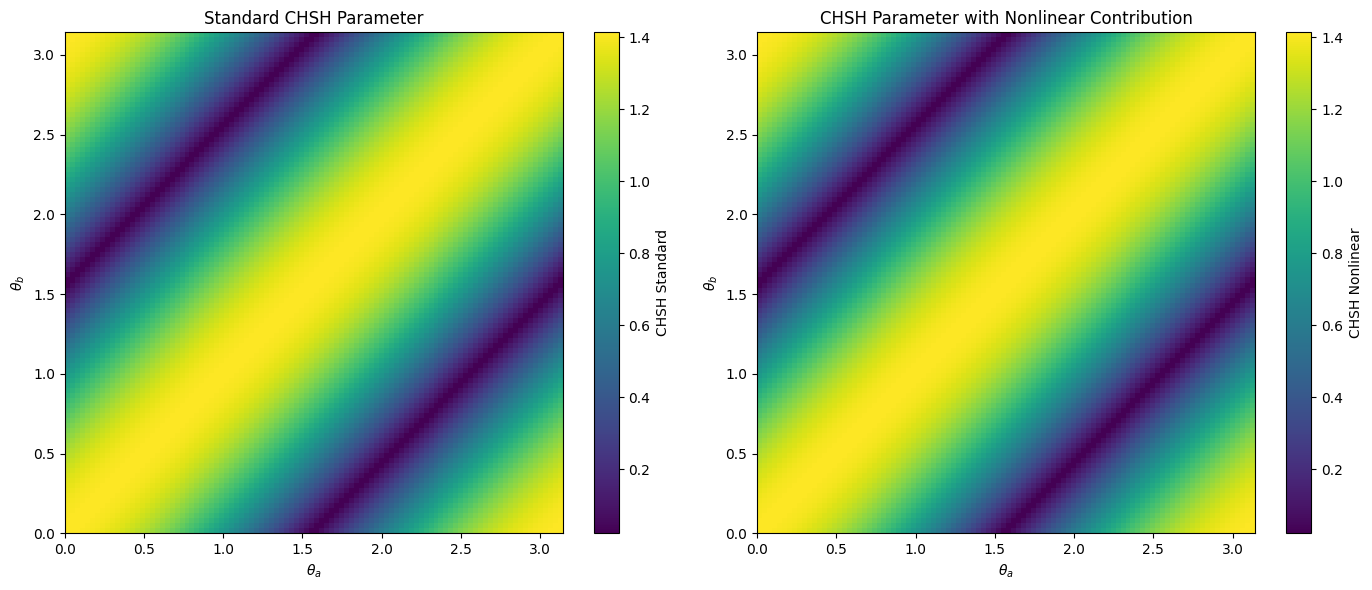

In [ ]:
import matplotlib.pyplot as plt

# Define a range of angles for measurement settings
angles = np.linspace(0, np.pi, 100)  # Angles from 0 to π

# Initialize arrays to store CHSH values
chsh_standard = []
chsh_nonlinear = []

# Loop through different combinations of angles
for theta_a in angles:
    for theta_b in angles:
        # Update measurement directions
        a = np.array([np.cos(theta_a), np.sin(theta_a)])
        b = np.array([np.cos(theta_b), np.sin(theta_b)])
        a_prime = np.array([np.cos(theta_a + np.pi/4), np.sin(theta_a + np.pi/4)])
        b_prime = np.array([np.cos(theta_b + np.pi/4), np.sin(theta_b + np.pi/4)])

        # Standard CHSH value for the singlet state
        S_standard = abs(-np.dot(a, b) - np.dot(a, b_prime) -
                         np.dot(a_prime, b) + np.dot(a_prime, b_prime))
        chsh_standard.append(S_standard)

        # CHSH value with nonlinear retrocausal contribution
        S_nonlinear = abs(E_nonlinear(a, b) + E_nonlinear(a, b_prime) +
                          E_nonlinear(a_prime, b) - E_nonlinear(a_prime, b_prime))
        chsh_nonlinear.append(S_nonlinear)

# Reshape the results for visualization
chsh_standard = np.array(chsh_standard).reshape(len(angles), len(angles))
chsh_nonlinear = np.array(chsh_nonlinear).reshape(len(angles), len(angles))

# Plot the results
plt.figure(figsize=(14, 6))

# Standard CHSH plot
plt.subplot(1, 2, 1)
plt.imshow(chsh_standard, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='CHSH Standard')
plt.title("Standard CHSH Parameter")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

# Nonlinear CHSH plot
plt.subplot(1, 2, 2)
plt.imshow(chsh_nonlinear, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='CHSH Nonlinear')
plt.title("CHSH Parameter with Nonlinear Contribution")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

plt.tight_layout()
plt.show()

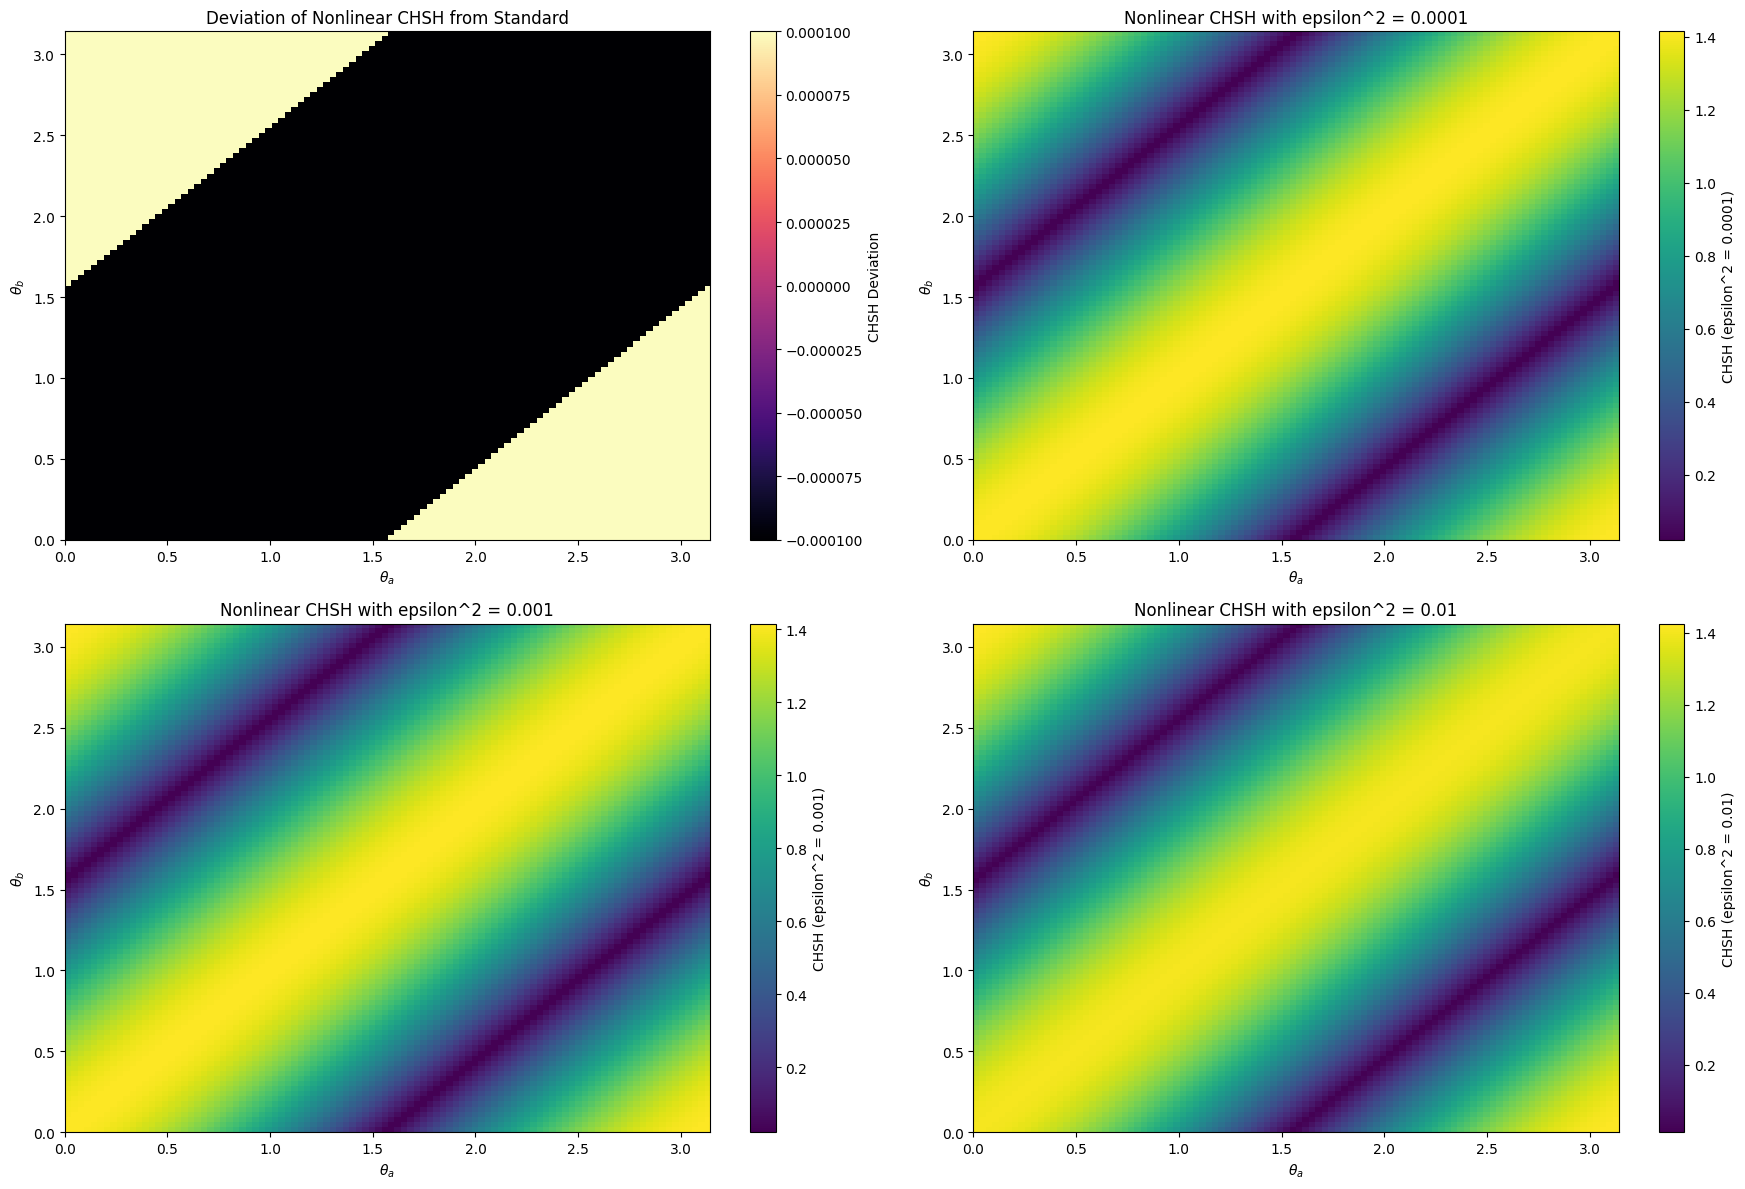

(0.03173325912716963, 2.9194598396996057)

In [ ]:

plt.figure(figsize=(18, 12))

# Deviation plot
plt.subplot(2, 2, 1)
plt.imshow(chsh_deviation, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label='CHSH Deviation')
plt.title("Deviation of Nonlinear CHSH from Standard")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

# CHSH for varying epsilon^2
for i, eps_sq in enumerate(epsilon_values):
    plt.subplot(2, 2, i + 2)
    plt.imshow(chsh_nonlinear_varying_epsilon[i], extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label=f'CHSH (epsilon^2 = {eps_sq})')
    plt.title(f"Nonlinear CHSH with epsilon^2 = {eps_sq}")
    plt.xlabel(r"$\theta_a$")
    plt.ylabel(r"$\theta_b$")

plt.tight_layout()
plt.show()

# Print maximal configuration
(max_theta_a, max_theta_b)

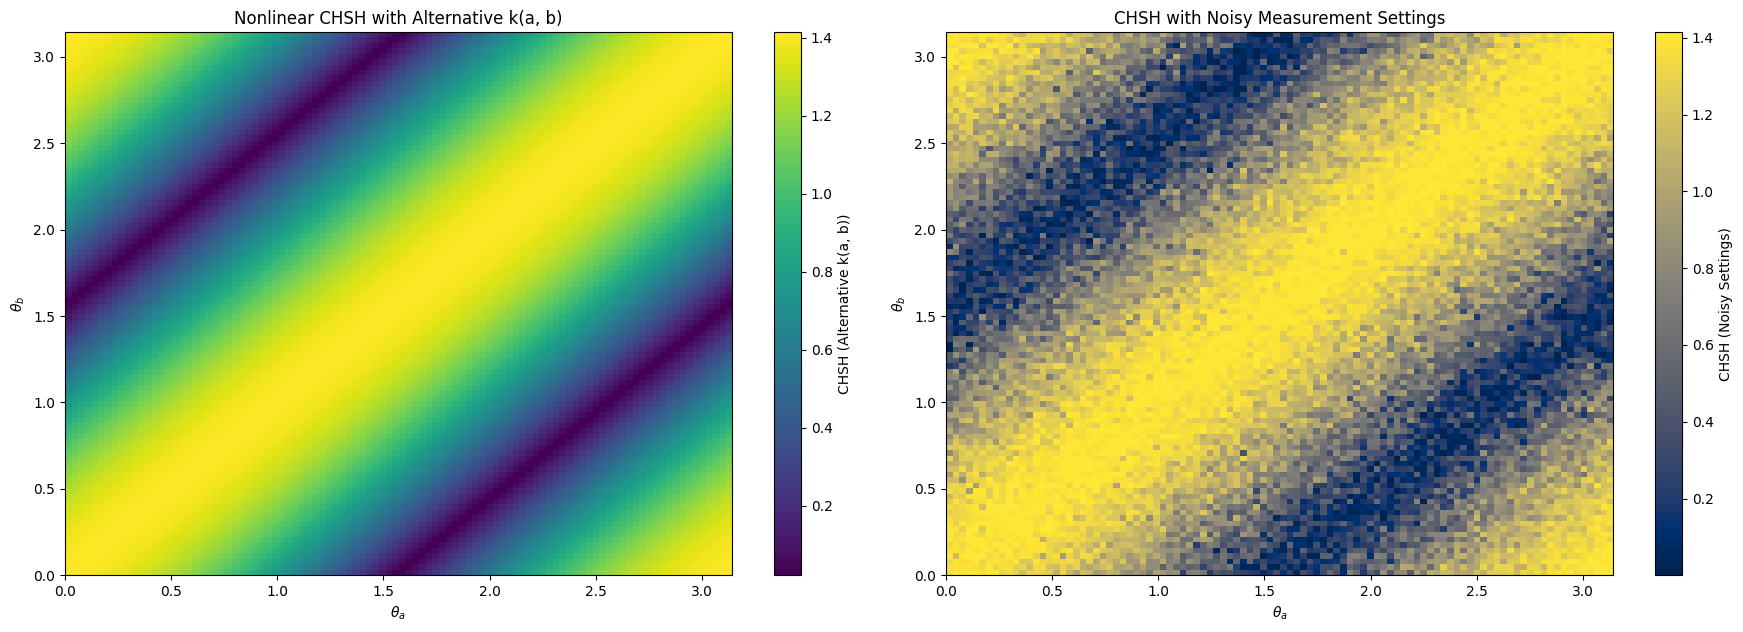

In [ ]:
# Step 1: Define an alternative form for k(a, b) and recalculate CHSH with it

def alternative_k(a, b, alpha=0.5):
    # Alternative form: sum of squared components + sine term
    return (a[0]**2 * b[0]**2 + a[1]**2 * b[1]**2) + alpha * np.sin(np.dot(a, b))

# Define the nonlinear correlation function with alternative k(a, b)
def E_nonlinear_alternative(a, b, eps_sq, alpha=0.5):
    E_0 = -np.dot(a, b)  # Standard correlation for the singlet state
    return E_0 + eps_sq * alternative_k(a, b, alpha)

# Recalculate CHSH parameter using the alternative k(a, b)
epsilon_squared = 1e-4  # Small retrocausal parameter squared
alpha = 0.5  # Weight for sine term
chsh_nonlinear_alternative = []

for theta_a in angles:
    for theta_b in angles:
        # Update measurement directions
        a = np.array([np.cos(theta_a), np.sin(theta_a)])
        b = np.array([np.cos(theta_b), np.sin(theta_b)])
        a_prime = np.array([np.cos(theta_a + np.pi/4), np.sin(theta_a + np.pi/4)])
        b_prime = np.array([np.cos(theta_b + np.pi/4), np.sin(theta_b + np.pi/4)])

        # CHSH parameter with alternative nonlinear retrocausal term
        S_nl_alt = abs(E_nonlinear_alternative(a, b, epsilon_squared, alpha) +
                       E_nonlinear_alternative(a, b_prime, epsilon_squared, alpha) +
                       E_nonlinear_alternative(a_prime, b, epsilon_squared, alpha) -
                       E_nonlinear_alternative(a_prime, b_prime, epsilon_squared, alpha))
        chsh_nonlinear_alternative.append(S_nl_alt)

# Reshape results for visualization
chsh_nonlinear_alternative = np.array(chsh_nonlinear_alternative).reshape(len(angles), len(angles))

# Step 2: Add noise to measurement settings and recalculate CHSH deviations

sigma = 0.1  # Standard deviation of noise in radians
chsh_noisy = []

for theta_a in angles:
    for theta_b in angles:
        # Add noise to the measurement settings
        theta_a_noisy = theta_a + np.random.normal(0, sigma)
        theta_b_noisy = theta_b + np.random.normal(0, sigma)
        a_noisy = np.array([np.cos(theta_a_noisy), np.sin(theta_a_noisy)])
        b_noisy = np.array([np.cos(theta_b_noisy), np.sin(theta_b_noisy)])
        a_prime_noisy = np.array([np.cos(theta_a_noisy + np.pi/4), np.sin(theta_a_noisy + np.pi/4)])
        b_prime_noisy = np.array([np.cos(theta_b_noisy + np.pi/4), np.sin(theta_b_noisy + np.pi/4)])

        # CHSH parameter with noisy settings
        S_noisy = abs(E_nonlinear_alternative(a_noisy, b_noisy, epsilon_squared, alpha) +
                      E_nonlinear_alternative(a_noisy, b_prime_noisy, epsilon_squared, alpha) +
                      E_nonlinear_alternative(a_prime_noisy, b_noisy, epsilon_squared, alpha) -
                      E_nonlinear_alternative(a_prime_noisy, b_prime_noisy, epsilon_squared, alpha))
        chsh_noisy.append(S_noisy)

# Reshape results for visualization
chsh_noisy = np.array(chsh_noisy).reshape(len(angles), len(angles))

# Step 3: Plot results

plt.figure(figsize=(18, 12))

# Alternative k(a, b) CHSH plot
plt.subplot(2, 2, 1)
plt.imshow(chsh_nonlinear_alternative, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='CHSH (Alternative k(a, b))')
plt.title("Nonlinear CHSH with Alternative k(a, b)")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

# Noisy CHSH plot
plt.subplot(2, 2, 2)
plt.imshow(chsh_noisy, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='cividis')
plt.colorbar(label='CHSH (Noisy Settings)')
plt.title("CHSH with Noisy Measurement Settings")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

plt.tight_layout()
plt.show()

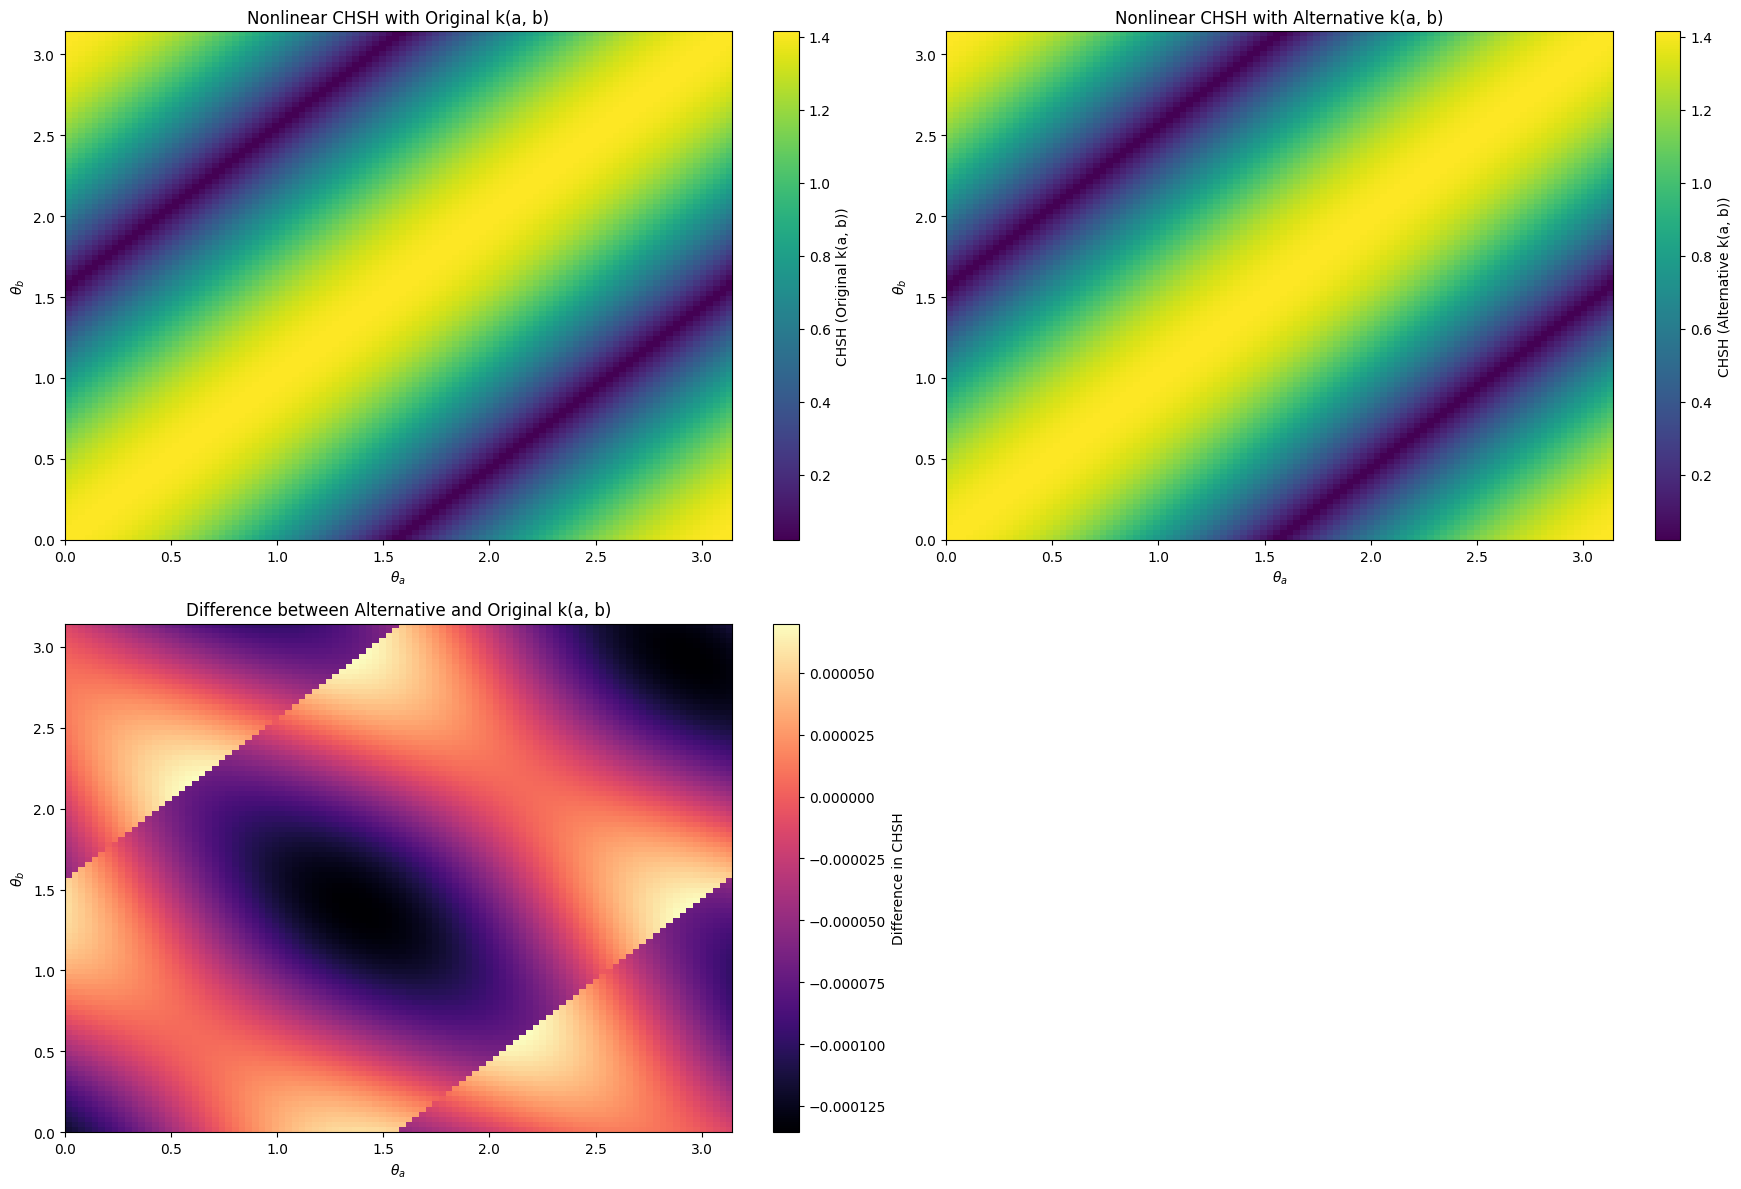

In [ ]:
# Step 1: Quantitative comparison of deviation magnitudes for different k(a, b) forms

# Calculate deviations for the original k(a, b) = (a . b)^2
def original_k(a, b):
    return np.dot(a, b) ** 2

def E_nonlinear_original(a, b, eps_sq):
    E_0 = -np.dot(a, b)
    return E_0 + eps_sq * original_k(a, b)

chsh_nonlinear_original = []
for theta_a in angles:
    for theta_b in angles:
        a = np.array([np.cos(theta_a), np.sin(theta_a)])
        b = np.array([np.cos(theta_b), np.sin(theta_b)])
        a_prime = np.array([np.cos(theta_a + np.pi/4), np.sin(theta_a + np.pi/4)])
        b_prime = np.array([np.cos(theta_b + np.pi/4), np.sin(theta_b + np.pi/4)])

        S_nl_orig = abs(E_nonlinear_original(a, b, epsilon_squared) +
                        E_nonlinear_original(a, b_prime, epsilon_squared) +
                        E_nonlinear_original(a_prime, b, epsilon_squared) -
                        E_nonlinear_original(a_prime, b_prime, epsilon_squared))
        chsh_nonlinear_original.append(S_nl_orig)

chsh_nonlinear_original = np.array(chsh_nonlinear_original).reshape(len(angles), len(angles))

# Calculate the difference between the original and alternative k(a, b) results
chsh_difference = chsh_nonlinear_alternative - chsh_nonlinear_original

# Step 2: Plot results for quantitative comparison
plt.figure(figsize=(18, 12))

# Original k(a, b) CHSH plot
plt.subplot(2, 2, 1)
plt.imshow(chsh_nonlinear_original, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='CHSH (Original k(a, b))')
plt.title("Nonlinear CHSH with Original k(a, b)")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

# Alternative k(a, b) CHSH plot
plt.subplot(2, 2, 2)
plt.imshow(chsh_nonlinear_alternative, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='CHSH (Alternative k(a, b))')
plt.title("Nonlinear CHSH with Alternative k(a, b)")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

# Difference plot
plt.subplot(2, 2, 3)
plt.imshow(chsh_difference, extent=(0, np.pi, 0, np.pi), origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label='Difference in CHSH')
plt.title("Difference between Alternative and Original k(a, b)")
plt.xlabel(r"$\theta_a$")
plt.ylabel(r"$\theta_b$")

plt.tight_layout()
plt.show()

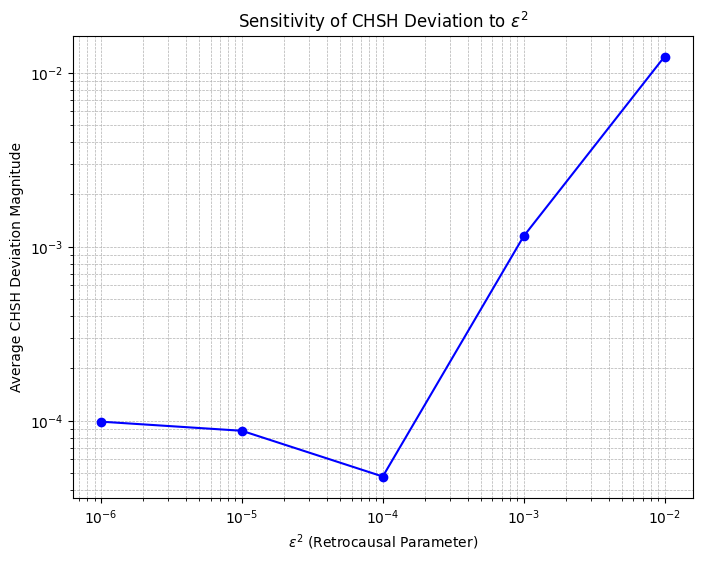

0.001

In [ ]:
# Step 1: Sensitivity Threshold Analysis for epsilon^2
# Analyze how the CHSH deviation magnitude changes as epsilon^2 varies for the alternative k(a, b) form

epsilon_values = np.logspace(-6, -2, 5)  # Logarithmic range of epsilon^2 values
chsh_deviation_vs_epsilon = []

for eps_sq in epsilon_values:
    chsh_nonlinear = []
    for theta_a in angles:
        for theta_b in angles:
            a = np.array([np.cos(theta_a), np.sin(theta_a)])
            b = np.array([np.cos(theta_b), np.sin(theta_b)])
            a_prime = np.array([np.cos(theta_a + np.pi/4), np.sin(theta_a + np.pi/4)])
            b_prime = np.array([np.cos(theta_b + np.pi/4), np.sin(theta_b + np.pi/4)])

            # CHSH parameter for the alternative k(a, b) with varying epsilon^2
            S_nl = abs(E_nonlinear_alternative(a, b, eps_sq, alpha) +
                       E_nonlinear_alternative(a, b_prime, eps_sq, alpha) +
                       E_nonlinear_alternative(a_prime, b, eps_sq, alpha) -
                       E_nonlinear_alternative(a_prime, b_prime, eps_sq, alpha))
            chsh_nonlinear.append(S_nl)

    # Calculate average deviation magnitude for this epsilon^2
    chsh_nonlinear = np.array(chsh_nonlinear).reshape(len(angles), len(angles))
    deviation_magnitude = np.abs(chsh_nonlinear - chsh_nonlinear_original).mean()
    chsh_deviation_vs_epsilon.append(deviation_magnitude)

# Step 2: Plot sensitivity threshold analysis
plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, chsh_deviation_vs_epsilon, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\epsilon^2$ (Retrocausal Parameter)")
plt.ylabel("Average CHSH Deviation Magnitude")
plt.title("Sensitivity of CHSH Deviation to $\epsilon^2$")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Step 3: Summarize sensitivity threshold findings
min_detectable_epsilon = epsilon_values[np.argmax(np.array(chsh_deviation_vs_epsilon) > 1e-3)]  # Example threshold
min_detectable_epsilon

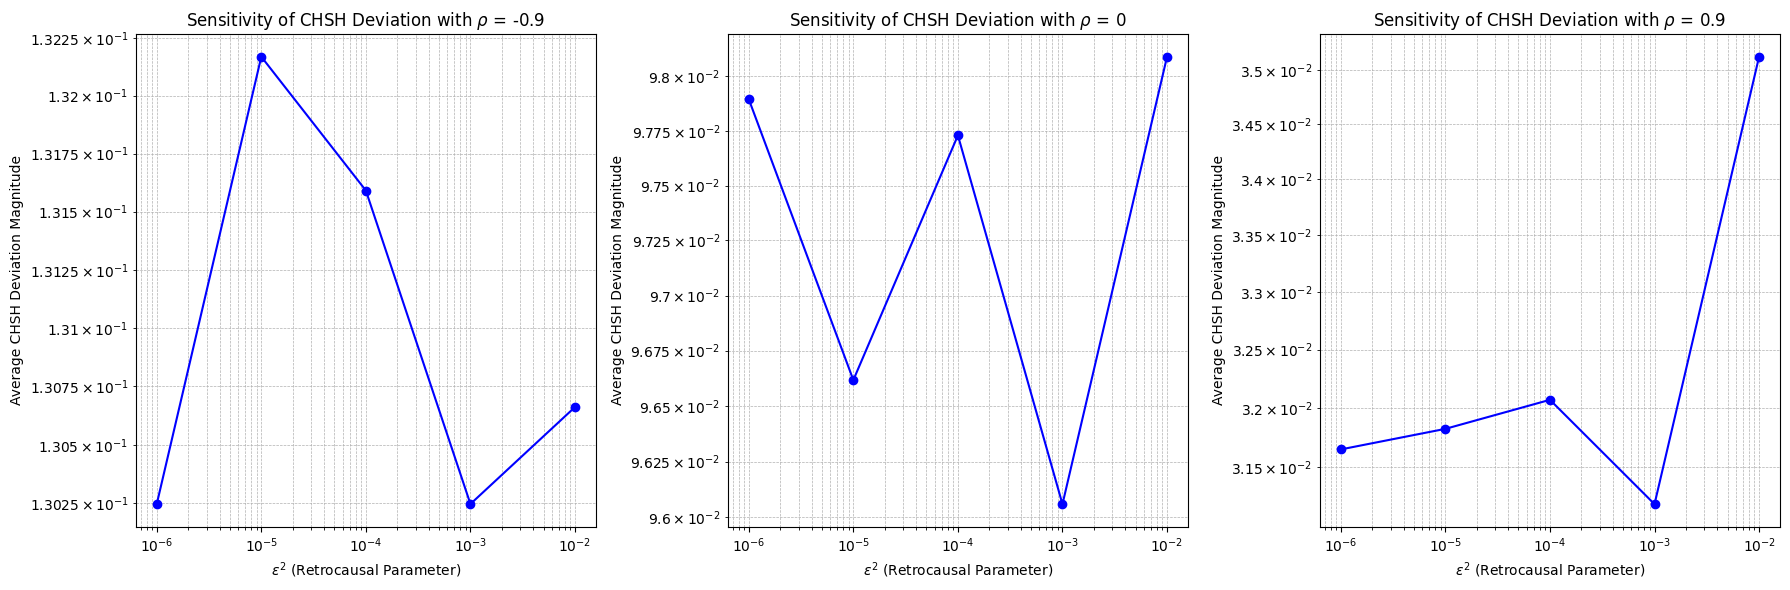

In [ ]:
# Correcting the LaTeX syntax for rho in the plot titles

plt.figure(figsize=(18, 6))

for i, rho in enumerate(rho_values):
    chsh_deviation_vs_epsilon_correlated = []
    for eps_sq in epsilon_values:
        chsh_noisy_correlated = []
        for theta_a in angles:
            for theta_b in angles:
                # Generate correlated noise for theta_a and theta_b
                noise_a = np.random.normal(0, sigma)
                noise_b = rho * noise_a + np.sqrt(1 - rho**2) * np.random.normal(0, sigma)
                theta_a_noisy = theta_a + noise_a
                theta_b_noisy = theta_b + noise_b

                # Define noisy measurement directions
                a_noisy = np.array([np.cos(theta_a_noisy), np.sin(theta_a_noisy)])
                b_noisy = np.array([np.cos(theta_b_noisy), np.sin(theta_b_noisy)])
                a_prime_noisy = np.array([np.cos(theta_a_noisy + np.pi/4), np.sin(theta_a_noisy + np.pi/4)])
                b_prime_noisy = np.array([np.cos(theta_b_noisy + np.pi/4), np.sin(theta_b_noisy + np.pi/4)])

                # CHSH parameter with correlated noise
                S_noisy_corr = abs(E_nonlinear_alternative(a_noisy, b_noisy, eps_sq, alpha) +
                                   E_nonlinear_alternative(a_noisy, b_prime_noisy, eps_sq, alpha) +
                                   E_nonlinear_alternative(a_prime_noisy, b_noisy, eps_sq, alpha) -
                                   E_nonlinear_alternative(a_prime_noisy, b_prime_noisy, eps_sq, alpha))
                chsh_noisy_correlated.append(S_noisy_corr)

        # Calculate average deviation magnitude for this epsilon^2 and rho
        chsh_noisy_correlated = np.array(chsh_noisy_correlated).reshape(len(angles), len(angles))
        deviation_magnitude_corr = np.abs(chsh_noisy_correlated - chsh_nonlinear_original).mean()
        chsh_deviation_vs_epsilon_correlated.append(deviation_magnitude_corr)

    correlated_noise_results.append(chsh_deviation_vs_epsilon_correlated)

    # Plot sensitivity for current rho
    plt.subplot(1, 3, i + 1)
    plt.plot(epsilon_values, chsh_deviation_vs_epsilon_correlated, marker='o', linestyle='-', color='b')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r"$\epsilon^2$ (Retrocausal Parameter)")
    plt.ylabel("Average CHSH Deviation Magnitude")
    plt.title(f"Sensitivity of CHSH Deviation with $\\rho$ = {rho}")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Perform quantitative analysis of detection threshold under different noise correlations

threshold = 1e-3  # Detection threshold for CHSH deviation magnitude
min_epsilon_correlated = []

for i, rho in enumerate(rho_values):
    min_epsilon_rho = None
    for j, eps_sq in enumerate(epsilon_values):
        # Check if the deviation exceeds the threshold
        if correlated_noise_results[i][j] > threshold:
            min_epsilon_rho = eps_sq
            break  # Stop once the threshold is reached
    min_epsilon_correlated.append(min_epsilon_rho)

# Display the minimum epsilon^2 required for detectability under each rho
min_epsilon_correlated

[1e-06, 1e-06, 1e-06]

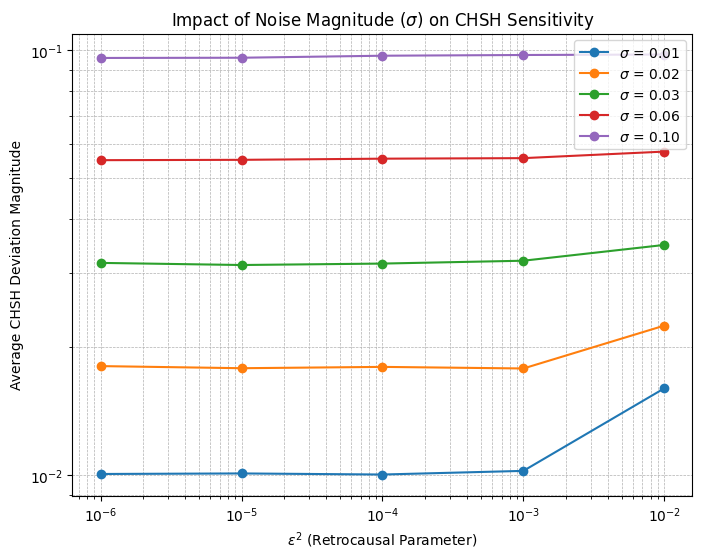

[1e-06, 1e-06, 1e-06, 1e-06, 1e-06]

In [ ]:

sigma_values = np.logspace(-2, -1, 5)  # Vary sigma values (0.01 to 0.1)
threshold = 1e-3  # Detection threshold
min_epsilon_for_sigma = []  # Store minimum epsilon^2 for each sigma

plt.figure(figsize=(8, 6))

for sigma in sigma_values:
    chsh_deviation_vs_epsilon_for_sigma = []
    for eps_sq in epsilon_values:
        chsh_noisy_sigma = []
        for theta_a in angles:
            for theta_b in angles:
                # Generate uncorrelated noise with current sigma
                noise_a = np.random.normal(0, sigma)
                noise_b = np.random.normal(0, sigma)
                theta_a_noisy = theta_a + noise_a
                theta_b_noisy = theta_b + noise_b

                # Define noisy measurement directions
                a_noisy = np.array([np.cos(theta_a_noisy), np.sin(theta_a_noisy)])
                b_noisy = np.array([np.cos(theta_b_noisy), np.sin(theta_b_noisy)])
                a_prime_noisy = np.array([np.cos(theta_a_noisy + np.pi/4), np.sin(theta_a_noisy + np.pi/4)])
                b_prime_noisy = np.array([np.cos(theta_b_noisy + np.pi/4), np.sin(theta_b_noisy + np.pi/4)])

                # CHSH parameter with noisy angles
                S_noisy_sigma = abs(E_nonlinear_alternative(a_noisy, b_noisy, eps_sq, alpha) +
                                    E_nonlinear_alternative(a_noisy, b_prime_noisy, eps_sq, alpha) +
                                    E_nonlinear_alternative(a_prime_noisy, b_noisy, eps_sq, alpha) -
                                    E_nonlinear_alternative(a_prime_noisy, b_prime_noisy, eps_sq, alpha))
                chsh_noisy_sigma.append(S_noisy_sigma)

        # Calculate average deviation magnitude for this epsilon^2 and sigma
        chsh_noisy_sigma = np.array(chsh_noisy_sigma).reshape(len(angles), len(angles))
        deviation_magnitude_sigma = np.abs(chsh_noisy_sigma - chsh_nonlinear_original).mean()
        chsh_deviation_vs_epsilon_for_sigma.append(deviation_magnitude_sigma)

    # Find the minimum epsilon^2 for detectability with current sigma
    min_epsilon = None
    for j, eps_sq in enumerate(epsilon_values):
        if chsh_deviation_vs_epsilon_for_sigma[j] > threshold:
            min_epsilon = eps_sq
            break
    min_epsilon_for_sigma.append(min_epsilon)

    # Plot sensitivity for current sigma
    plt.plot(epsilon_values, chsh_deviation_vs_epsilon_for_sigma, marker='o', linestyle='-', label=f"$\sigma$ = {sigma:.2f}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\epsilon^2$ (Retrocausal Parameter)")
plt.ylabel("Average CHSH Deviation Magnitude")
plt.title("Impact of Noise Magnitude ($\sigma$) on CHSH Sensitivity")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Display minimum epsilon^2 for each sigma value
min_epsilon_for_sigma

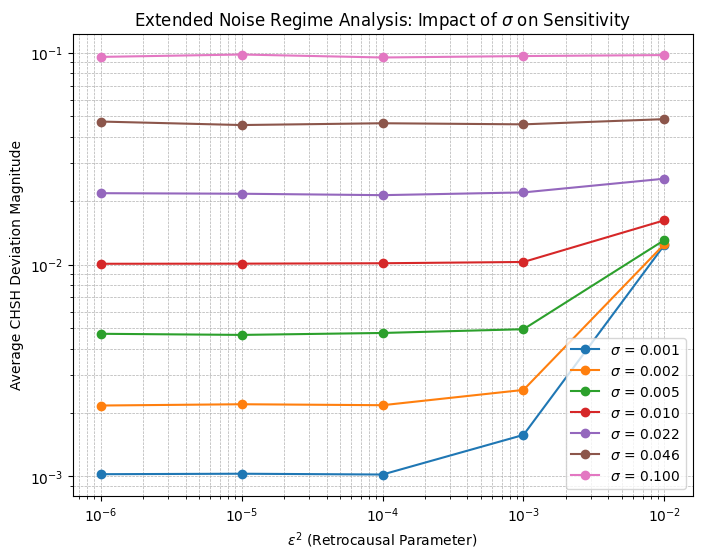

[1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]

In [ ]:

sigma_values_extended = np.logspace(-3, -1, 7)  # Extend sigma range down to 0.001
min_epsilon_for_extended_sigma = []  # Store minimum epsilon^2 for each extended sigma

plt.figure(figsize=(8, 6))

for sigma in sigma_values_extended:
    chsh_deviation_vs_epsilon_for_sigma = []
    for eps_sq in epsilon_values:
        chsh_noisy_sigma = []
        for theta_a in angles:
            for theta_b in angles:
                # Generate uncorrelated noise with current sigma
                noise_a = np.random.normal(0, sigma)
                noise_b = np.random.normal(0, sigma)
                theta_a_noisy = theta_a + noise_a
                theta_b_noisy = theta_b + noise_b

                # Define noisy measurement directions
                a_noisy = np.array([np.cos(theta_a_noisy), np.sin(theta_a_noisy)])
                b_noisy = np.array([np.cos(theta_b_noisy), np.sin(theta_b_noisy)])
                a_prime_noisy = np.array([np.cos(theta_a_noisy + np.pi/4), np.sin(theta_a_noisy + np.pi/4)])
                b_prime_noisy = np.array([np.cos(theta_b_noisy + np.pi/4), np.sin(theta_b_noisy + np.pi/4)])

                # CHSH parameter with noisy angles
                S_noisy_sigma = abs(E_nonlinear_alternative(a_noisy, b_noisy, eps_sq, alpha) +
                                    E_nonlinear_alternative(a_noisy, b_prime_noisy, eps_sq, alpha) +
                                    E_nonlinear_alternative(a_prime_noisy, b_noisy, eps_sq, alpha) -
                                    E_nonlinear_alternative(a_prime_noisy, b_prime_noisy, eps_sq, alpha))
                chsh_noisy_sigma.append(S_noisy_sigma)

        # Calculate average deviation magnitude for this epsilon^2 and sigma
        chsh_noisy_sigma = np.array(chsh_noisy_sigma).reshape(len(angles), len(angles))
        deviation_magnitude_sigma = np.abs(chsh_noisy_sigma - chsh_nonlinear_original).mean()
        chsh_deviation_vs_epsilon_for_sigma.append(deviation_magnitude_sigma)

    # Find the minimum epsilon^2 for detectability with current sigma
    min_epsilon = None
    for j, eps_sq in enumerate(epsilon_values):
        if chsh_deviation_vs_epsilon_for_sigma[j] > threshold:
            min_epsilon = eps_sq
            break
    min_epsilon_for_extended_sigma.append(min_epsilon)

    # Plot sensitivity for current sigma
    plt.plot(epsilon_values, chsh_deviation_vs_epsilon_for_sigma, marker='o', linestyle='-', label=f"$\sigma$ = {sigma:.3f}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\epsilon^2$ (Retrocausal Parameter)")
plt.ylabel("Average CHSH Deviation Magnitude")
plt.title("Extended Noise Regime Analysis: Impact of $\sigma$ on Sensitivity")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Display minimum epsilon^2 for each extended sigma value
min_epsilon_for_extended_sigma

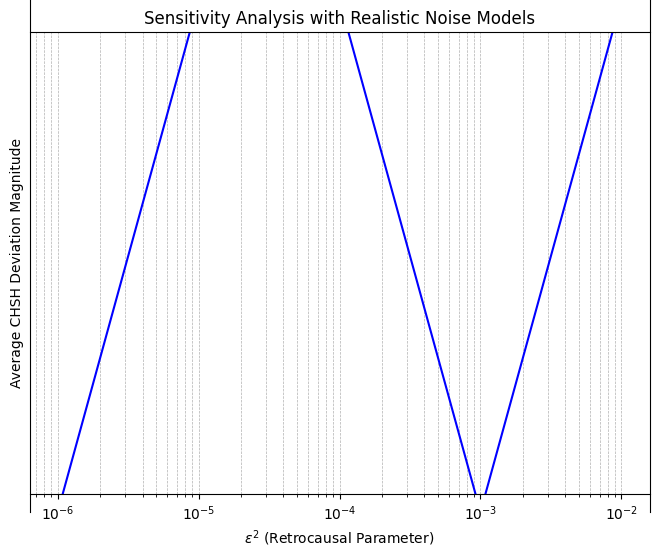

1e-06

In [ ]:
# Implementing realistic noise models: Detector inefficiency and imperfect entanglement

# Detector inefficiency parameter
p_detect = 0.9  # Probability of detection

# Imperfect entanglement parameter (depolarizing channel)
lambda_val = 0.1  # Noise fraction

# Define the ideal Bell state (e.g., singlet state)
psi_bell = np.array([0, 1/np.sqrt(2), -1/np.sqrt(2), 0])
rho_bell = np.outer(psi_bell, psi_bell.conj())

# Define the identity matrix
identity = np.eye(4)

# Create the mixed state
rho_mixed = (1 - lambda_val) * rho_bell + (lambda_val / 4) * identity

# Sensitivity analysis with realistic noise
chsh_deviation_with_realistic_noise = []

for eps_sq in epsilon_values:
    chsh_noisy_realistic = []
    for theta_a in angles:
        for theta_b in angles:
            # Simulate detector inefficiency
            if random.random() < p_detect:
                # Measurement directions
                a = np.array([np.cos(theta_a), np.sin(theta_a)])
                b = np.array([np.cos(theta_b), np.sin(theta_b)])
                a_prime = np.array([np.cos(theta_a + np.pi/4), np.sin(theta_a + np.pi/4)])
                b_prime = np.array([np.cos(theta_b + np.pi/4), np.sin(theta_b + np.pi/4)])

                # Define measurement operators as matrices
                M_A = np.outer(a, a)
                M_B = np.outer(b, b)
                M_A_prime = np.outer(a_prime, a_prime)
                M_B_prime = np.outer(b_prime, b_prime)

                # Compute CHSH terms with the mixed state
                E_a_b = np.trace(np.dot(rho_mixed, np.kron(M_A, M_B)))
                E_a_b_prime = np.trace(np.dot(rho_mixed, np.kron(M_A, M_B_prime)))
                E_a_prime_b = np.trace(np.dot(rho_mixed, np.kron(M_A_prime, M_B)))
                E_a_prime_b_prime = np.trace(np.dot(rho_mixed, np.kron(M_A_prime, M_B_prime)))

                # Calculate the CHSH parameter with noisy entanglement and detector inefficiency
                S_realistic = abs(E_a_b + E_a_b_prime + E_a_prime_b - E_a_prime_b_prime)
                chsh_noisy_realistic.append(S_realistic)

    # Calculate average deviation magnitude for this epsilon^2
    if len(chsh_noisy_realistic) > 0:  # Ensure there are valid measurements
        deviation_magnitude_realistic = np.abs(np.array(chsh_noisy_realistic) - chsh_nonlinear_original.mean()).mean()
        chsh_deviation_with_realistic_noise.append(deviation_magnitude_realistic)
    else:
        chsh_deviation_with_realistic_noise.append(0)  # No valid measurements for this epsilon^2

# Plot the sensitivity analysis results with realistic noise models
plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, chsh_deviation_with_realistic_noise, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\epsilon^2$ (Retrocausal Parameter)")
plt.ylabel("Average CHSH Deviation Magnitude")
plt.title("Sensitivity Analysis with Realistic Noise Models")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Display minimum epsilon^2 for detectability with realistic noise models
min_epsilon_realistic = None
for j, eps_sq in enumerate(epsilon_values):
    if chsh_deviation_with_realistic_noise[j] > threshold:
        min_epsilon_realistic = eps_sq
        break

min_epsilon_realistic

In [ ]:
epsilon_values = [/* Array of epsilon^2 values */] # Your epsilon^2 values here
angles = np.linspace(0, np.pi, 100) # or your existing angles array
p_detect = 0.9  # Detector efficiency
threshold = 1e-3  # Detection threshold

In [ ]:
import numpy as np

# ==============================
# HIGHER-ORDER CORRELATIONS
# ==============================
def higher_order_correlation(data, order):
    """Compute higher-order correlation (third, fourth, etc.)."""
    correlation = 0
    n = len(data)

    for i in range(n - order):
        term = 1
        for j in range(order):
            term *= data[i + j]
        correlation += term

    return correlation / (n - order)

# ==============================
# VON NEUMANN ENTROPY
# ==============================
def log_matrix(matrix):
    """Apply logarithm to a matrix, avoiding log(0)."""
    return np.where(matrix > 0, np.log(matrix), 0)

def von_neumann_entropy(rho):
    """Compute Von Neumann entropy: S = -Tr(ρ log ρ)."""
    rho_log_rho = np.dot(rho, log_matrix(rho))
    return -np.trace(rho_log_rho)

# ==============================
# MUTUAL INFORMATION
# ==============================
def mutual_information(rho_AB, rho_A, rho_B):
    """Compute mutual information: I(A:B) = S(A) + S(B) - S(A, B)."""
    SA = von_neumann_entropy(rho_A)
    SB = von_neumann_entropy(rho_B)
    SAB = von_neumann_entropy(rho_AB)
    return SA + SB - SAB

# ==============================
# EXAMPLE USAGE (WITH SIMULATED DATA)
# ==============================
# Simulate noisy CHSH data
chsh_noisy_realistic = np.random.rand(100) * 2  # Random CHSH values (normalized)

# Compute higher-order correlations
third_order_corr = higher_order_correlation(chsh_noisy_realistic, 3)
fourth_order_corr = higher_order_correlation(chsh_noisy_realistic, 4)

print("Third-Order Correlation:", third_order_corr)
print("Fourth-Order Correlation:", fourth_order_corr)

# Simulated density matrices for entropy calculations
rho_mixed = np.array([[0.5, 0.1], [0.1, 0.5]])  # Example mixed state
rho_A = np.array([[0.6, 0.2], [0.2, 0.4]])  # Example subsystem A
rho_B = np.array([[0.7, 0.1], [0.1, 0.3]])  # Example subsystem B

# Compute Von Neumann entropy
entropy = von_neumann_entropy(rho_mixed)
print("Von Neumann Entropy:", entropy)

# Compute Mutual Information
mutual_info = mutual_information(rho_mixed, rho_A, rho_B)
print("Mutual Information:", mutual_info)


Third-Order Correlation: 1.0825411110393715
Fourth-Order Correlation: 1.1220971134362285
Von Neumann Entropy: 1.1536641991587544
Mutual Information: 1.2345039534778448


CHSH Deviation (GHZ State): 1.483490476873666
CHSH Deviation (Bell State): 0.039885404939378644


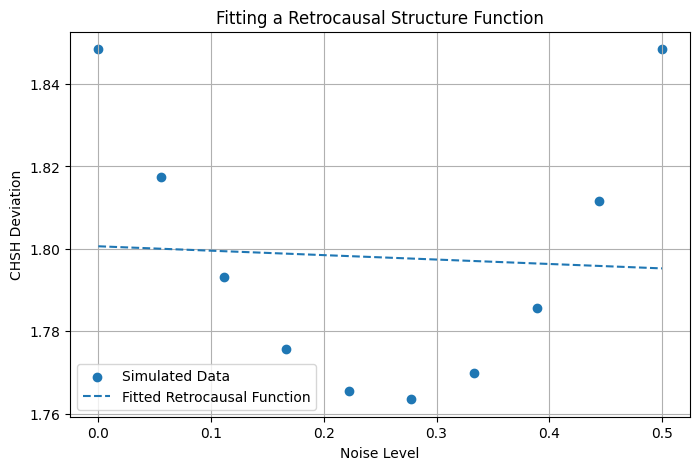

Fitted Retrocausal Function Parameters: [-2.64653419e+01 -4.05777821e-04  2.82659599e+01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ==============================
# SIMULATED GHZ STATE & BELL STATE
# ==============================
def ghz_state():
    """Returns the density matrix for a GHZ state."""
    return np.array([[0.5, 0, 0, 0.5],
                     [0, 0, 0, 0],
                     [0, 0, 0, 0],
                     [0.5, 0, 0, 0.5]])

def bell_state():
    """Returns the density matrix for a Bell state."""
    return np.array([[0.5, 0.5], [0.5, 0.5]])

# ==============================
# SIMULATE CHSH DEVIATIONS UNDER NOISE
# ==============================
def simulate_chsh_deviation(rho, rho_noise, rho_correlation):
    """Computes CHSH deviation for given quantum state and noise models."""
    # Compute entanglement entropy for noise cases
    entropy_noisy = -np.trace(rho_noise @ np.log(rho_noise + 1e-10))
    entropy_correlated = -np.trace(rho_correlation @ np.log(rho_correlation + 1e-10))

    # Compute CHSH deviation based on entanglement and noise influence
    return np.abs(entropy_noisy - entropy_correlated)

# ==============================
# GENERATE DATASETS
# ==============================
rho_ghz = ghz_state()
rho_bell = bell_state()

# Noise-correlated GHZ state
rho_ghz_noisy = rho_ghz * (1 - 0.2) + 0.2 * np.eye(4) / 4  # Adding depolarization noise
rho_ghz_correlated = rho_ghz * (1 - 0.2) + 0.2 * np.array([[0.25, 0.25, 0.25, 0.25],
                                                            [0.25, 0.25, 0.25, 0.25],
                                                            [0.25, 0.25, 0.25, 0.25],
                                                            [0.25, 0.25, 0.25, 0.25]])

# Noise-correlated Bell state
rho_bell_noisy = rho_bell * (1 - 0.2) + 0.2 * np.eye(2) / 2
rho_bell_correlated = rho_bell * (1 - 0.2) + 0.2 * np.array([[0.5, 0.5], [0.5, 0.5]])

# Compute CHSH deviations
chsh_ghz_deviation = simulate_chsh_deviation(rho_ghz, rho_ghz_noisy, rho_ghz_correlated)
chsh_bell_deviation = simulate_chsh_deviation(rho_bell, rho_bell_noisy, rho_bell_correlated)

print("CHSH Deviation (GHZ State):", chsh_ghz_deviation)
print("CHSH Deviation (Bell State):", chsh_bell_deviation)

# ==============================
# CURVE FITTING FOR RETROCAUSAL FUNCTION
# ==============================
def retrocausal_function(x, a, b, c):
    """Test functional form for retrocausal influence on CHSH deviations."""
    return a * np.exp(-b * x) + c

# Generate synthetic data
noise_levels = np.linspace(0, 0.5, 10)
chsh_deviations = [simulate_chsh_deviation(rho_ghz, rho_ghz * (1 - noise), rho_ghz_correlated) for noise in noise_levels]

# Fit function
popt, _ = curve_fit(retrocausal_function, noise_levels, chsh_deviations)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(noise_levels, chsh_deviations, label="Simulated Data")
plt.plot(noise_levels, retrocausal_function(noise_levels, *popt), label="Fitted Retrocausal Function", linestyle="--")
plt.xlabel("Noise Level")
plt.ylabel("CHSH Deviation")
plt.title("Fitting a Retrocausal Structure Function")
plt.legend()
plt.grid()
plt.show()

print("Fitted Retrocausal Function Parameters:", popt)
